# Read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
import sklearn.cluster as cluster

df = pd.read_csv(r"cul_cat1.csv",index_col=[0])
df.head()

,tns_name,previous_name,repeater_name,ra,dec,gb,bonsai_dm,low_ft_68,up_ft_68,low_ft_95,...,log_width_fitb,log_high_freq,log_low_freq,log_peak_freq,log_fre_width,log_redshift,log_in_duration,log_energy,log_luminosity,log_T_B
0,FRB20180725A,180725.J0613+67,non-repeater,93.42,67.07,21.29,716.6,0.0,2.7,0.0,...,-3.528708,2.880871,2.686010,2.783475,2.654057,-0.193318,-0.743748,40.451471,43.284176,29.741595
1,FRB20180727A,180727.J1311+26,non-repeater,197.72,26.42,85.60,642.1,0.0,1.9,0.0,...,-2.856985,2.903199,2.602277,2.693111,2.810184,-0.211253,-0.065109,40.075391,42.683330,29.418756
2,FRB20180729A,180729.J1316+55,non-repeater,199.40,55.58,61.16,108.4,0.0,4.6,0.0,...,-4.000000,2.840545,2.602277,2.720655,2.467101,-2.648161,-1.000975,36.029529,38.868241,26.685375
3,FRB20180729B,180729.J0558+56,non-repeater,89.93,56.50,15.68,318.6,0.0,0.9,0.0,...,-3.503070,2.903199,2.645226,2.817896,2.617914,-0.802538,-0.566616,38.696017,41.644170,28.500531
4,FRB20180730A,180730.J0353+87,non-repeater,57.39,87.19,25.11,849.2,3.3,2.3,6.1,...,-3.329754,2.880356,2.602277,2.684396,2.810947,-0.095607,-0.585606,41.368382,43.908874,30.178429


# UMAP(Uniform Manifold Approximation and Projection)

In [2]:
col=[
    'peak_freq','log_bc_width','log_flux','log_fluence','redshift','fre_width','log_in_duration','log_energy', 'log_luminosity','log_T_B'
]
cat1_data = df[col]
s_cat1_data=pd.DataFrame(StandardScaler().fit_transform(cat1_data),columns=col)
s_cat1_data.head()

,peak_freq,log_bc_width,log_flux,log_fluence,redshift,fre_width,log_in_duration,log_energy,log_luminosity,log_T_B
0,0.825297,-0.555301,0.480323,-0.139974,0.242795,-0.012350,-1.471694,0.596879,0.770394,0.753209
1,-0.181899,-0.555301,-0.719513,-0.708955,0.190411,0.786521,0.158006,0.314229,0.346949,0.567362
2,0.103223,-1.592633,2.632576,1.270459,-1.047467,-0.658312,-2.089405,-2.726515,-2.341735,-1.006153
3,1.267546,-0.935376,-0.204763,-1.358450,-0.733602,-0.159810,-1.046325,-0.722465,-0.385400,0.038771
4,-0.268407,-0.073818,1.727774,1.729246,0.569486,0.791175,-1.091929,1.286001,1.210650,1.004679


### fit_transform

In [3]:
''' p=12
for i in [24]:
    for j in range(0,151):
        clusterable_embedding = umap.UMAP(
            n_neighbors=i,
            min_dist=0,
            n_components=2,
            random_state=j,
        ).fit_transform(cat1_data)
        sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.8*p)})
        plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
                    c=[sns.color_palette()[x] for x in df.repeater_name.map({"non-repeater":0, "repeater":1})],
                    s=[y for y in df.repeater_name.map({"non-repeater":10, "repeater":100})],
                    )#, cmap='Spectral')
        plt.gca().set_aspect('equal', 'datalim')
        title='neighbor_'+str(i)+' random_'+str(j)
        plt.title('UMAP projection '+title, fontsize=24)
        plt.savefig('./UMAP_random_state/'+title+'.png')
        #plt.show()
        plt.cla()
        #break  '''

' p=12\nfor i in [24]:\n    for j in range(0,151):\n        clusterable_embedding = umap.UMAP(\n            n_neighbors=i,\n            min_dist=0,\n            n_components=2,\n            random_state=j,\n        ).fit_transform(cat1_data)\n        sns.set(context=\'notebook\', style=\'white\', rc={\'figure.figsize\':(p,0.8*p)})\n        plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],\n                    c=[sns.color_palette()[x] for x in df.repeater_name.map({"non-repeater":0, "repeater":1})],\n                    s=[y for y in df.repeater_name.map({"non-repeater":10, "repeater":100})],\n                    )#, cmap=\'Spectral\')\n        plt.gca().set_aspect(\'equal\', \'datalim\')\n        title=\'neighbor_\'+str(i)+\' random_\'+str(j)\n        plt.title(\'UMAP projection \'+title, fontsize=24)\n        plt.savefig(\'./UMAP_random_state/\'+title+\'.png\')\n        #plt.show()\n        plt.cla()\n        #break  '

In [4]:
clusterable_embedding = umap.UMAP(
    n_neighbors=24,#8,
    min_dist=0,
    n_components=2,
    random_state=54
).fit_transform(cat1_data)
clf = pd.DataFrame(data = clusterable_embedding, columns = ['x','y'])
clf['repeater']=df['repeater_name'].copy()

/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_4414/2230316000.py:7: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f9c7ab54e20> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)


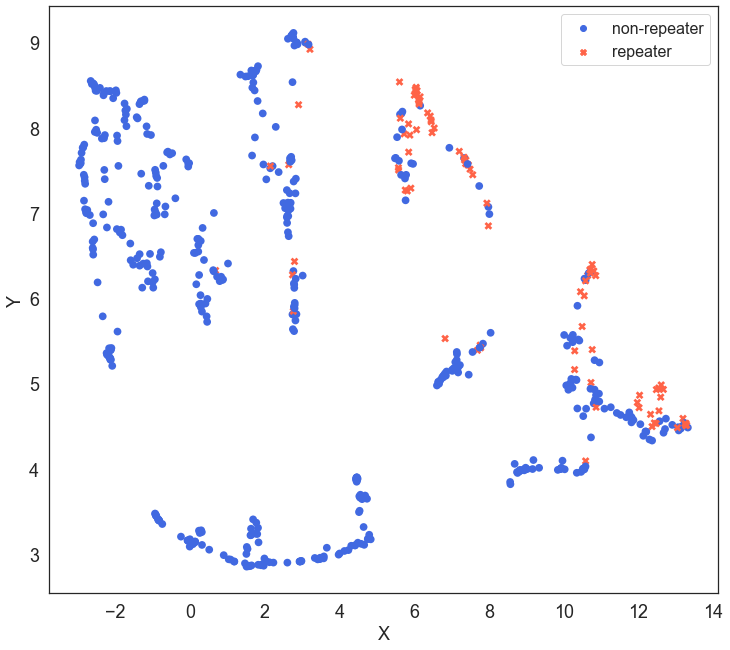

In [5]:
p=12
fs=18
s=5*p
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
color=['royalblue','tomato']
sns.scatterplot(x='x',y='y',hue='repeater',style='repeater',data=clf,linewidth=0,palette=color,s=s)
plt.legend(['_','non-repeater','repeater'],fontsize=fs-2)
#plt.title('UMAP',fontsize=18)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'./fig/UMAP.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

For FAST observation

In [6]:
""" obs=clf.copy()
p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
list=["FRB20180928A","FRB20181030E","FRB20181220A","FRB20190109B","FRB20190412B","FRB20190423B","FRB20190625A","FRB20181231B","FRB20190527A"]
for l in list:
    obs.loc[np.ravel(np.where(df.loc[:,'tns_name']==l)),'repeater']=l
color_obs=['navy','red','lightsalmon','gold','lawngreen','pink','turquoise','aqua','indigo','cornflowerblue','violet']
sns.scatterplot(x='x',y='y',data=obs,hue='repeater',
                palette=color_obs,
                s=20+80*((obs.loc[:,'repeater']!='repeater')&(obs.loc[:,'repeater']!='non-repeater')),
                edgecolor='black',linewidth=0.5)
plt.title('UMAP',fontsize=18)
plt.xlabel(None,fontsize=18)
plt.ylabel(None,fontsize=18) """

' obs=clf.copy()\np=12\nsns.set(context=\'notebook\', style=\'white\', rc={\'figure.figsize\':(p,0.9*p)})\nlist=["FRB20180928A","FRB20181030E","FRB20181220A","FRB20190109B","FRB20190412B","FRB20190423B","FRB20190625A","FRB20181231B","FRB20190527A"]\nfor l in list:\n    obs.loc[np.ravel(np.where(df.loc[:,\'tns_name\']==l)),\'repeater\']=l\ncolor_obs=[\'navy\',\'red\',\'lightsalmon\',\'gold\',\'lawngreen\',\'pink\',\'turquoise\',\'aqua\',\'indigo\',\'cornflowerblue\',\'violet\']\nsns.scatterplot(x=\'x\',y=\'y\',data=obs,hue=\'repeater\',\n                palette=color_obs,\n                s=20+80*((obs.loc[:,\'repeater\']!=\'repeater\')&(obs.loc[:,\'repeater\']!=\'non-repeater\')),\n                edgecolor=\'black\',linewidth=0.5)\nplt.title(\'UMAP\',fontsize=18)\nplt.xlabel(None,fontsize=18)\nplt.ylabel(None,fontsize=18) '

# HDBSCAN cluster

In [10]:
import hdbscan
import unml
labels = hdbscan.HDBSCAN(
    min_cluster_size=22,#22
    min_samples=8,
    #cluster_selection_epsilon=0.5#1.7
).fit_predict(clusterable_embedding)
#if(-1 in labels):print('False')
#labels=unml.noise_points_cl(labels_list=labels,embedding=clusterable_embedding)
print(np.max(labels))

""" p=12
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.8*p)})
fig,ax=plt.subplots()
clustered = (labels >= 0)
scatn=ax.scatter(clusterable_embedding[~clustered, 0],clusterable_embedding[~clustered, 1],color=(0.5, 0.5, 0.5),alpha=0.5,s=100)#灰色
scat1=ax.scatter(clusterable_embedding[clustered, 0],clusterable_embedding[clustered, 1],c=labels[clustered],cmap='Paired',s=10)
plt.show() """

#if(-1 in labels):print('F')#labels[np.where(labels==-1)]=np.max(labels+1)
#clf['UMAP_HDBSCAN_c']=labels
UMAP_HD=pd.DataFrame(data=clusterable_embedding,columns=['x','y'])

UMAP_HD['labels']=labels
#UMAP_HD.head()

6


In [11]:
n_labels,nrp_lb,oth_lb,rp_lb=unml.ML_label(labels=UMAP_HD['labels'],observe=df['repeater_name'],threshold=0.2,test=True)
clf['UMAP_HDBSCAN_c']=n_labels
print([nrp_lb,oth_lb,rp_lb])

0         0.0
1         0.0
2    0.029412
3    0.093023
4    0.121212
5    0.294118
6     0.66129
Name: rp_ratio, dtype: object
[array([0, 1]), array([2, 3, 4]), array([5, 6])]


/Volumes/Macintosh HD - Data/Research/summer project/FRB_ML_unsp/unml.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_labels[i]=new[labels[i]==old]


/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_4414/4156146085.py:14: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f9ca14ff340> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(labels=lg,


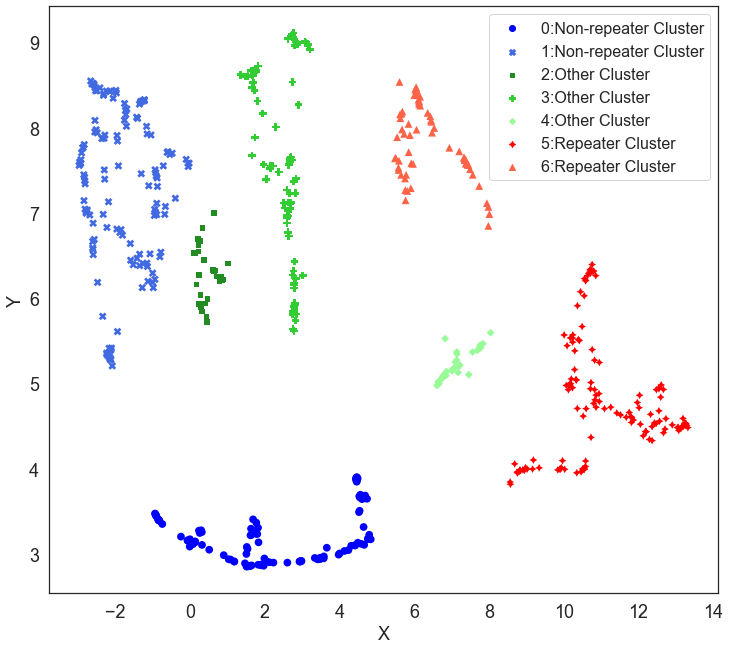

In [12]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
UMAP_HD['labels']=n_labels
color=['blue','royalblue',#'cornflowerblue','lightskyblue',
       'forestgreen','limegreen','palegreen',
       'red','tomato'#,'lightsalmon'
       ]
sns.scatterplot(x='x',y='y',hue = 'UMAP_HDBSCAN_c',data=clf,legend='full',
                linewidth=0,
                palette=color,style='UMAP_HDBSCAN_c',s=s)#'viridis_r')
lg=(['_']+[str(i)+':Non-repeater Cluster' for i in nrp_lb]+
    [str(i)+':Other Cluster' for i in oth_lb]+
    [str(i)+':Repeater Cluster' for i in rp_lb])
#plt.legend(loc='best',ncol=2)
plt.legend(labels=lg,
           loc='best',fontsize=fs-2)
#plt.title('UMAP with HDBSCAN',fontsize=fs)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)
#plt.gca().set_aspect('equal')
plt.savefig(f'./fig/UMAP_HD.png',bbox_inches='tight',dpi=100,pad_inches=0.1)

# Mutual Information

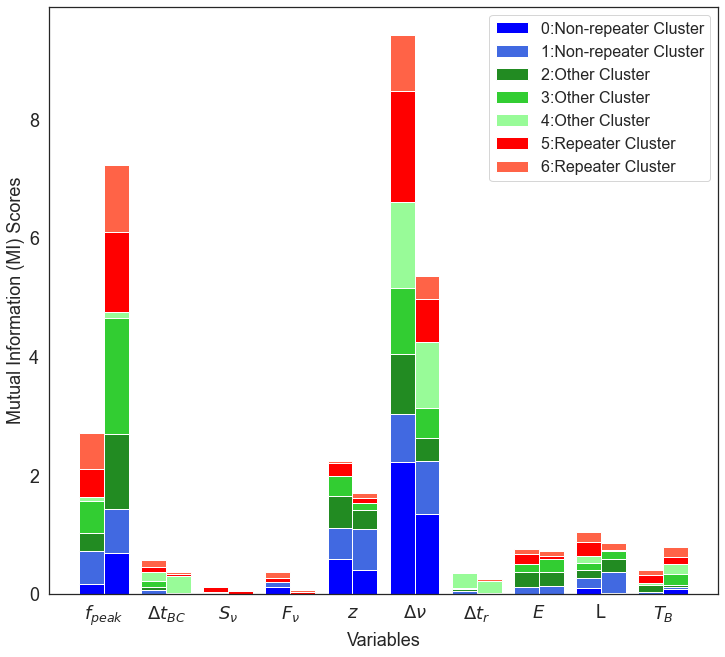

In [10]:
from unml import get_mi_score

p=12
#'fre_width','peak_freq','log_bc_width','log_flux', 'log_fluence','redshift','log_energy', 'log_in_duration','log_luminosity','log_T_B'
colx=[r'$f_{peak}$',r'$\Delta t_{BC}$',r'$S_{\nu} $',r'$F_{\nu} $',r'$z$',r'$\Delta \nu$',r'$\Delta t_r$',r'$E$',r'L',r'$T_B$']
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
width=0.4
x=np.arange(len(col))
fig,ax=plt.subplots()

lgf=([str(i)+':Non-repeater Cluster' for i in nrp_lb]+
    [str(i)+':Other Cluster' for i in oth_lb]+
    [str(i)+':Repeater Cluster' for i in rp_lb])

for i in range(np.min(n_labels),np.max(n_labels)+1):
    mi_score=get_mi_score(cat1_data,label=i,embedding=clf[['x','y']],labels_list=n_labels,axis='x')
    if(i==np.min(n_labels)):
        rects1=ax.bar(x-width/2,mi_score['x'],width,label='label'+str(i),color=color[i])
        bt=mi_score['x']
    else:
        rects1=ax.bar(x-width/2,mi_score['x'],width,label='label'+str(i),color=color[i],bottom=bt)
        bt=bt+mi_score['x'].values

for i in range(np.min(n_labels),np.max(n_labels)+1):
    mi_score=get_mi_score(cat1_data,label=i,embedding=clf[['x','y']],labels_list=n_labels,axis='y')
    if(i==np.min(n_labels)):
        rects2=ax.bar(x+width/2,mi_score['y'],width,label='label'+str(i),color=color[i])
        bt=mi_score['y']
    else:
        rects2=ax.bar(x+width/2,mi_score['y'],width,label='label'+str(i),color=color[i],bottom=bt)
        bt=bt+mi_score['y'].values

ax.legend(lgf,loc='best',fontsize=fs-2)
#ax.set_title('Features Correlation in UMAP',fontsize=fs)
ax.set_xlabel('Variables',fontsize=fs)
plt.tick_params(labelsize=fs)
ax.set_ylabel('Mutual Information (MI) Scores',fontsize=fs)
#ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(colx)
#legend('Principal Component 1',fontsize=18)
plt.savefig(f'./fig/UMAP_feature.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

# Analysis

### t-SNE in UMAP

In [11]:
r3=pd.read_csv(r'TSNE_labels.csv')
r3['x']=clusterable_embedding[:, 0]
r3['y']=clusterable_embedding[:, 1]
r3.head()

,tns_name,repeater_name,TSNE_HDBSCAN,x,y
0,FRB20180725A,non-repeater,4,2.592320,7.266803
1,FRB20180727A,non-repeater,0,-1.155150,6.409351
2,FRB20180729A,non-repeater,3,7.139438,5.367730
3,FRB20180729B,non-repeater,4,2.708099,7.657382
4,FRB20180730A,non-repeater,0,-1.249732,6.404686


/var/folders/fc/xg8bhkd13290b9rq284609fh0000gn/T/ipykernel_2332/1301415701.py:9: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7fd250ecc2e0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(labels=['_','0:Non-repeater Cluster','1:Non-repeater Cluster','2:Other Cluster','3:Other Cluster','4:Other Cluster','5:Repeater Cluster','6:Repeater Cluster'],loc='best',fontsize=fs-2)


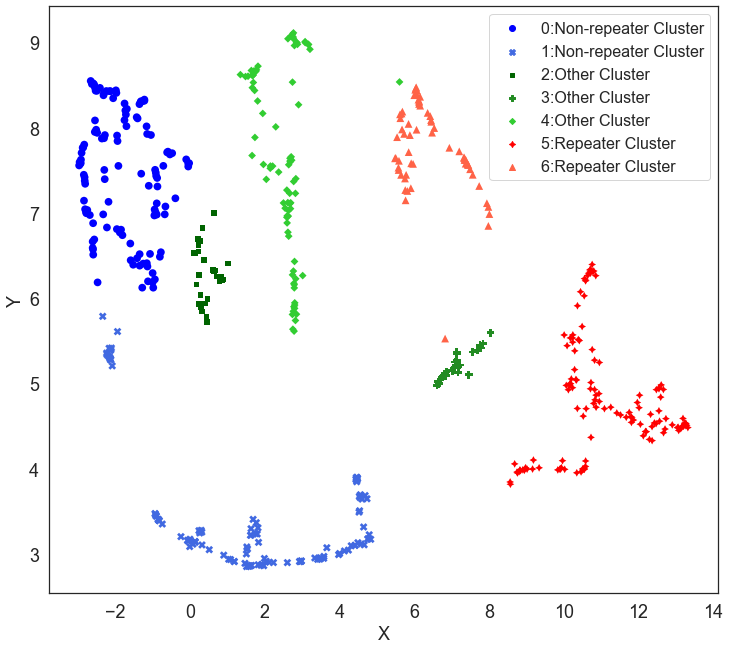

In [12]:
p=12
TSNE_color=['blue','royalblue',#'cornflowerblue',#'lightskyblue',
       'darkgreen','forestgreen','limegreen',#'palegreen',
       'red','tomato'#,'lightsalmon'
       ]
sns.set(context='notebook', style='white', rc={'figure.figsize':(p,0.9*p)})
sns.scatterplot(x='x',y='y',hue = 'TSNE_HDBSCAN',data=r3,legend='full',linewidth=0,palette=TSNE_color,style='TSNE_HDBSCAN',s=s)
#plt.title('t-SNE with HDBSCAN in UMAP', fontsize=fs)
plt.legend(labels=['_','0:Non-repeater Cluster','1:Non-repeater Cluster','2:Other Cluster','3:Other Cluster','4:Other Cluster','5:Repeater Cluster','6:Repeater Cluster'],loc='best',fontsize=fs-2)
plt.xlabel('X',fontsize=fs)
plt.ylabel('Y',fontsize=fs)
plt.tick_params(labelsize=fs)
#plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(f'./fig/TSNE_HDBSCAN_UMAP.png',bbox_inches='tight',dpi=100,pad_inches=0.1)
plt.show()

# All results

In [13]:
tf=clf[['repeater','UMAP_HDBSCAN_c']]
tf.columns=['repeater','UMAP_HDBSCAN']
tf.to_csv(r'UMAP_labels.csv',index=False)
tf.head()

,repeater,UMAP_HDBSCAN
0,non-repeater,3
1,non-repeater,1
2,non-repeater,4
3,non-repeater,3
4,non-repeater,1


### UMAP_HDBSCAN

In [14]:
clf['UMAP_HDBSCAN']=np.zeros(len(clf['UMAP_HDBSCAN_c']))
for i in range(len(clf['repeater'].values)):
    if (clf.loc[i,'UMAP_HDBSCAN_c'] in rp_lb):
        clf.loc[i,'UMAP_HDBSCAN']=1#repeater
    elif(clf.loc[i,'UMAP_HDBSCAN_c'] in nrp_lb):
        clf.loc[i,'UMAP_HDBSCAN']=-1#non-repeater
clf.head()

,x,y,repeater,UMAP_HDBSCAN_c,UMAP_HDBSCAN
0,2.592320,7.266803,non-repeater,3,0.0
1,-1.155150,6.409351,non-repeater,1,-1.0
2,7.139438,5.367730,non-repeater,4,0.0
3,2.708099,7.657382,non-repeater,3,0.0
4,-1.249732,6.404686,non-repeater,1,-1.0


In [15]:
clf.drop(columns=['UMAP_HDBSCAN_c','x','y'],inplace=True)
clf.head()

,repeater,UMAP_HDBSCAN
0,non-repeater,0.0
1,non-repeater,-1.0
2,non-repeater,0.0
3,non-repeater,0.0
4,non-repeater,-1.0


In [16]:
clf.to_csv(r'UMAP_result.csv',index=False)